<a href="https://colab.research.google.com/github/amr-salaaah/Complex-numbers-using-python/blob/main/Complex_numbers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Defining Class of complex number
with methods add, sub, mul , div,

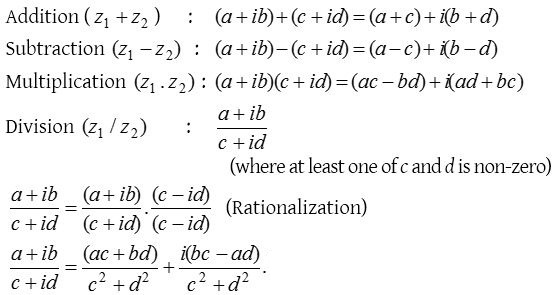

the root function was used from :
https://www.emathhelp.net/calculators/algebra-2/nth-roots-of-complex-number-calculator/?i=3%2B4i&n=4

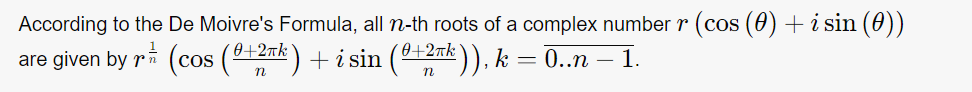


In [ ]:
     
import numpy as np  #used to calculate theta and roots of complex number only

class complx_num :

  def __init__(self, real, image):  #class constructor
        self.real = real            #attributes are real part and imaginary part
        self.image = image
  def get_real(self):                  #method used to return the the real part of complex number
    return(self.real)
  def get_image(self):                  #method used to return the the image part of complex number
    return(self.image)

  def norm(self):                  #method used to return the the norm of complex number
    return(pow((self.real**2 + self.image**2), 0.5) )

  def theta(self):                 #method used to return theta for complex number in radian value
    try:
      arc=abs(self.image/self.real)                                    # theta = getting tan-1(y/x)
      if(self.real>0 and self.image>=0) : return(np.arctan(arc))       #angle in first quarter      
      if(self.real<0 and self.image>=0) : return(np.pi-np.arctan(arc)) #angle in second quarter   
      if(self.real<0 and self.image<0) : return(np.pi+np.arctan(arc))  #angle in third quarter
      if(self.real>0 and self.image<0) : return(2*np.pi-np.arctan(arc))##angle in fourth quarter
    except ZeroDivisionError :   # exception handling in case of real part =0 
     if self.image==0:           
      return(0)                  #both real and image =0, so theta =0 
     elif self.image>0:
      return(np.pi/2)            #image part is positive so theta is PI/2 
     elif self.image<0:
      return(3*np.pi/2)          #image part is negative so theta  is 3PI/2

#defining the addition function
  def add(self,add_complex):                        #inputs: the complex number to be added
    outputcomplex=complx_num(0,0)                   #intializing the output complex number before operation 
    outputcomplex.real=self.real+add_complex.real    #adding real parts together
    outputcomplex.image=self.image+add_complex.image  #adding image parts together
    return(outputcomplex) 

#defining the subtraction function
  def sub(self,sub_complex):                          #inputs: the complex number to be subtracted
    outputcomplex=complx_num(0,0)                     #intializing the output complex number before operation
    outputcomplex.real=self.real-sub_complex.real     #subtract real parts
    outputcomplex.image=self.image-sub_complex.image  ##subtract image parts
    return(outputcomplex) 

#defining the multiplication function
  def mul(self,mul_complex):                                                                #inputs: the complex number to be multiplied
    outputcomplex=complx_num(0,0)                                                           #intializing the output complex number before operation 
    outputcomplex.real=(self.real*mul_complex.real ) - (self.image*mul_complex.image)       # real part = real 1*real 2 - image 1 *image 2
    outputcomplex.image=(self.image* mul_complex.real )  + ( self.real * mul_complex.image) # image part = real 1* image 2 + image 1 *real 2
    return(outputcomplex) 

#defining the division function
  def div(self,div_complex):                         #inputs: the complex number to be divided by (divisor)
   try: 
    outputcomplex=complx_num(0,0)                    #intializing the output complex number before operation
    divisor = ( div_complex.real **2 ) + ( div_complex.image **2 )
    outputcomplex.real= ((self.real * div_complex.real) +  (self.image * div_complex.image)) / divisor
    outputcomplex.image= ((self.image * div_complex.real) -  (self.real * div_complex.image)) / divisor
    return(outputcomplex) 
   #exception handling to handle the case of divided by zero : in case real and image of complex are zero 
   except ZeroDivisionError:     
     print("complex divisor cannot be zero")   #print error of division by zero
     return(complx_num(0,0))                  #return Zero in case of divided by zero


#defining the power function, the function used to multiply complex number by it self a number of times
  def pow(self,power):                         #inputs: the power must be power not root
   power_abs=abs(power)                        #getting the absolute value of the power as the negative power will be handled after that                  
   if power_abs >0 and power_abs <1 :          #confirm calculating power not root 
      print("Please use root functin to calculate roots")  #tell user to use the other function to calculate root
      return(complx_num(0,0))                              #return 0+0i and don't make calculations
   else:   
      outputcomplex=complx_num(1,0)              #intializing the output complex number before operation  to 1 as power (x,0) = 1                        
      for i in range(power_abs) :                #looping to multiplicate the complex number by itself 
        outputcomplex=outputcomplex.mul(self)    #self multiplication 
   if power >=0:                                #return the value of the multiplication in case power is positive
      return(outputcomplex)
   else :
      return(complx_num(1,0).div(outputcomplex))   #return the inverse value in case power is negative

      
#defining the root function
  def root(self,root):                         #inputs: the root number must be positive integer and not zero                    
   if not( isinstance(root,int)) or root <= 0:           #confirm that the root is integer value and not zero
      print("root value must be an positive integer and not zero")    #indicate user 
      return(complx_num(0,0))                                #return 0 and don't continue calculations
   else:   
      roots=[]                                 #Creating list of the roots to be calculated
      #Reference for the following equation : https://www.emathhelp.net/calculators/algebra-2/nth-roots-of-complex-number-calculator/
      root_norm=pow(self.norm(),1/root)        #calculating the common norm for all roots                
      for i in range(root) :                #looping to calculate the number of roots ex: 4 roots if root = 4
         root_theta=(self.theta()+2*np.pi*(i-1))/root   #calculate theta for each root
         outputcomplex=complx_num(root_norm*np.cos(root_theta),root_norm*np.sin(root_theta))  #intiating the root
         roots.append(outputcomplex)            # adding the calculated root to the list                                 
      return roots                              #return the value (A list of all roots)
   
 
  def display_roots(self,root):           # the function is used to print all roots of the complex number  input = root
      if not( isinstance(root,int)) or root <= 0:           #confirm that the root is integer value and not zero
       print("root value must be an positive integer and not zero")    #indicate user 
       return(complx_num(0,0))                                #return 0 and don't continue calculations
      else:   
        output_roots=self.root(root)        #calculate roots from the above function root
        for j in range(root):               #display all roots calculated on screen
          print(output_roots[j].value())    



  def value(self):  # this function returns the value of the complex number as a string in the form (X+Yi)
    if self.image<0:
      return(str(self.real)+"-"+str(-(self.image))+"i")         # in case Y <0   ---->  X-YI  
    else: 
       return(str(self.real)+"+"+str((self.image))+"i")         ## in case Y >=0   ---->  X+YI
      

Creating test data



In [ ]:
#test data were choosen to cover most possible cases, combinations and boundaries like (0,0) , we can add or remove from test data here
test_data=[\
complx_num(-9,0),\
complx_num(9,0),\
complx_num(0,5),\
complx_num(0,-8),\
complx_num(0,0),\
complx_num(1,1),\
complx_num(1,-3),\
complx_num(6,4),\
complx_num(8,12),\
complx_num(-5,-3),\
complx_num(-4,2),\
]

Num_test_data = len(test_data)


Testing functions of  norm , theta and value of each item in the test data


In [ ]:
for i in range(Num_test_data):
  print("real part of test_data[",i,"]=",test_data[i].get_real())
  print("image part of test_data[",i,"]=",test_data[i].get_image())
  print("value of test_data[",i,"]=",test_data[i].value())
  print("norm of test_data[",i,"]=",test_data[i].norm())
  print("theta of test_data[",i,"]=",test_data[i].theta())
  print("-------------------------------")


real part of test_data[ 0 ]= -9
image part of test_data[ 0 ]= 0
value of test_data[ 0 ]= -9+0i
norm of test_data[ 0 ]= 9.0
theta of test_data[ 0 ]= 3.141592653589793
-------------------------------
real part of test_data[ 1 ]= 9
image part of test_data[ 1 ]= 0
value of test_data[ 1 ]= 9+0i
norm of test_data[ 1 ]= 9.0
theta of test_data[ 1 ]= 0.0
-------------------------------
real part of test_data[ 2 ]= 0
image part of test_data[ 2 ]= 5
value of test_data[ 2 ]= 0+5i
norm of test_data[ 2 ]= 5.0
theta of test_data[ 2 ]= 1.5707963267948966
-------------------------------
real part of test_data[ 3 ]= 0
image part of test_data[ 3 ]= -8
value of test_data[ 3 ]= 0-8i
norm of test_data[ 3 ]= 8.0
theta of test_data[ 3 ]= 4.71238898038469
-------------------------------
real part of test_data[ 4 ]= 0
image part of test_data[ 4 ]= 0
value of test_data[ 4 ]= 0+0i
norm of test_data[ 4 ]= 0.0
theta of test_data[ 4 ]= 0
-------------------------------
real part of test_data[ 5 ]= 1
image part of te

Testing Add function
results could be verified from this link
https://www.emathhelp.net/calculators/algebra-2/complex-number-calculator/

In [ ]:
#looping all test data recursively   #could be optimized
for i in range(Num_test_data):
  for j in range(Num_test_data):
    result=test_data[i].add(test_data[j])
    print(test_data[i].value(),"+",test_data[j].value(),"=",result.value())
  print("-------------------------------")

-9+0i + -9+0i = -18+0i
-9+0i + 9+0i = 0+0i
-9+0i + 0+5i = -9+5i
-9+0i + 0-8i = -9-8i
-9+0i + 0+0i = -9+0i
-9+0i + 1+1i = -8+1i
-9+0i + 1-3i = -8-3i
-9+0i + 6+4i = -3+4i
-9+0i + 8+12i = -1+12i
-9+0i + -5-3i = -14-3i
-9+0i + -4+2i = -13+2i
-------------------------------
9+0i + -9+0i = 0+0i
9+0i + 9+0i = 18+0i
9+0i + 0+5i = 9+5i
9+0i + 0-8i = 9-8i
9+0i + 0+0i = 9+0i
9+0i + 1+1i = 10+1i
9+0i + 1-3i = 10-3i
9+0i + 6+4i = 15+4i
9+0i + 8+12i = 17+12i
9+0i + -5-3i = 4-3i
9+0i + -4+2i = 5+2i
-------------------------------
0+5i + -9+0i = -9+5i
0+5i + 9+0i = 9+5i
0+5i + 0+5i = 0+10i
0+5i + 0-8i = 0-3i
0+5i + 0+0i = 0+5i
0+5i + 1+1i = 1+6i
0+5i + 1-3i = 1+2i
0+5i + 6+4i = 6+9i
0+5i + 8+12i = 8+17i
0+5i + -5-3i = -5+2i
0+5i + -4+2i = -4+7i
-------------------------------
0-8i + -9+0i = -9-8i
0-8i + 9+0i = 9-8i
0-8i + 0+5i = 0-3i
0-8i + 0-8i = 0-16i
0-8i + 0+0i = 0-8i
0-8i + 1+1i = 1-7i
0-8i + 1-3i = 1-11i
0-8i + 6+4i = 6-4i
0-8i + 8+12i = 8+4i
0-8i + -5-3i = -5-11i
0-8i + -4+2i = -4-6i
----------

Testing Sub Function
results could be verified from this link
https://www.emathhelp.net/calculators/algebra-2/complex-number-calculator/

In [ ]:
#looping all test data recursively
for i in range(Num_test_data):
  for j in range(Num_test_data):
    result=test_data[i].sub(test_data[j])
    print(test_data[i].value(),"-",test_data[j].value(),"=",result.value())
  print("-------------------------------")

-9+0i - -9+0i = 0+0i
-9+0i - 9+0i = -18+0i
-9+0i - 0+5i = -9-5i
-9+0i - 0-8i = -9+8i
-9+0i - 0+0i = -9+0i
-9+0i - 1+1i = -10-1i
-9+0i - 1-3i = -10+3i
-9+0i - 6+4i = -15-4i
-9+0i - 8+12i = -17-12i
-9+0i - -5-3i = -4+3i
-9+0i - -4+2i = -5-2i
-------------------------------
9+0i - -9+0i = 18+0i
9+0i - 9+0i = 0+0i
9+0i - 0+5i = 9-5i
9+0i - 0-8i = 9+8i
9+0i - 0+0i = 9+0i
9+0i - 1+1i = 8-1i
9+0i - 1-3i = 8+3i
9+0i - 6+4i = 3-4i
9+0i - 8+12i = 1-12i
9+0i - -5-3i = 14+3i
9+0i - -4+2i = 13-2i
-------------------------------
0+5i - -9+0i = 9+5i
0+5i - 9+0i = -9+5i
0+5i - 0+5i = 0+0i
0+5i - 0-8i = 0+13i
0+5i - 0+0i = 0+5i
0+5i - 1+1i = -1+4i
0+5i - 1-3i = -1+8i
0+5i - 6+4i = -6+1i
0+5i - 8+12i = -8-7i
0+5i - -5-3i = 5+8i
0+5i - -4+2i = 4+3i
-------------------------------
0-8i - -9+0i = 9-8i
0-8i - 9+0i = -9-8i
0-8i - 0+5i = 0-13i
0-8i - 0-8i = 0+0i
0-8i - 0+0i = 0-8i
0-8i - 1+1i = -1-9i
0-8i - 1-3i = -1-5i
0-8i - 6+4i = -6-12i
0-8i - 8+12i = -8-20i
0-8i - -5-3i = 5-5i
0-8i - -4+2i = 4-10i
------

Testing Multiply function
results could be verified from this link
https://www.emathhelp.net/calculators/algebra-2/complex-number-calculator/

In [ ]:
#looping all test data recursively
for i in range(Num_test_data):
  for j in range(Num_test_data):
    result=test_data[i].mul(test_data[j])
    print(test_data[i].value(),"*",test_data[j].value(),"=",result.value())
  print("-------------------------------")  

-9+0i * -9+0i = 81+0i
-9+0i * 9+0i = -81+0i
-9+0i * 0+5i = 0-45i
-9+0i * 0-8i = 0+72i
-9+0i * 0+0i = 0+0i
-9+0i * 1+1i = -9-9i
-9+0i * 1-3i = -9+27i
-9+0i * 6+4i = -54-36i
-9+0i * 8+12i = -72-108i
-9+0i * -5-3i = 45+27i
-9+0i * -4+2i = 36-18i
-------------------------------
9+0i * -9+0i = -81+0i
9+0i * 9+0i = 81+0i
9+0i * 0+5i = 0+45i
9+0i * 0-8i = 0-72i
9+0i * 0+0i = 0+0i
9+0i * 1+1i = 9+9i
9+0i * 1-3i = 9-27i
9+0i * 6+4i = 54+36i
9+0i * 8+12i = 72+108i
9+0i * -5-3i = -45-27i
9+0i * -4+2i = -36+18i
-------------------------------
0+5i * -9+0i = 0-45i
0+5i * 9+0i = 0+45i
0+5i * 0+5i = -25+0i
0+5i * 0-8i = 40+0i
0+5i * 0+0i = 0+0i
0+5i * 1+1i = -5+5i
0+5i * 1-3i = 15+5i
0+5i * 6+4i = -20+30i
0+5i * 8+12i = -60+40i
0+5i * -5-3i = 15-25i
0+5i * -4+2i = -10-20i
-------------------------------
0-8i * -9+0i = 0+72i
0-8i * 9+0i = 0-72i
0-8i * 0+5i = 40+0i
0-8i * 0-8i = -64+0i
0-8i * 0+0i = 0+0i
0-8i * 1+1i = 8-8i
0-8i * 1-3i = -24-8i
0-8i * 6+4i = 32-48i
0-8i * 8+12i = 96-64i
0-8i * -5-3i = -

Testing division function
results could be verified from this link
https://www.emathhelp.net/calculators/algebra-2/complex-number-calculator/

In [ ]:
#looping all test data recursively
for i in range(Num_test_data):
  for j in range(Num_test_data):
    result=test_data[i].div(test_data[j])
    print(test_data[i].value(),"/",test_data[j].value(),"=",result.value())
  print("-------------------------------")  

-9+0i / -9+0i = 1.0+0.0i
-9+0i / 9+0i = -1.0+0.0i
-9+0i / 0+5i = 0.0+1.8i
-9+0i / 0-8i = 0.0-1.125i
complex divisor cannot be zero
-9+0i / 0+0i = 0+0i
-9+0i / 1+1i = -4.5+4.5i
-9+0i / 1-3i = -0.9-2.7i
-9+0i / 6+4i = -1.0384615384615385+0.6923076923076923i
-9+0i / 8+12i = -0.34615384615384615+0.5192307692307693i
-9+0i / -5-3i = 1.3235294117647058-0.7941176470588235i
-9+0i / -4+2i = 1.8+0.9i
-------------------------------
9+0i / -9+0i = -1.0+0.0i
9+0i / 9+0i = 1.0+0.0i
9+0i / 0+5i = 0.0-1.8i
9+0i / 0-8i = 0.0+1.125i
complex divisor cannot be zero
9+0i / 0+0i = 0+0i
9+0i / 1+1i = 4.5-4.5i
9+0i / 1-3i = 0.9+2.7i
9+0i / 6+4i = 1.0384615384615385-0.6923076923076923i
9+0i / 8+12i = 0.34615384615384615-0.5192307692307693i
9+0i / -5-3i = -1.3235294117647058+0.7941176470588235i
9+0i / -4+2i = -1.8-0.9i
-------------------------------
0+5i / -9+0i = 0.0-0.5555555555555556i
0+5i / 9+0i = 0.0+0.5555555555555556i
0+5i / 0+5i = 1.0+0.0i
0+5i / 0-8i = -0.625+0.0i
complex divisor cannot be zero
0+5i /

Testing power function
Solution could be verified fro link
https://www.symbolab.com/solver/complex-numbers-calculator

In [ ]:
#power_test_data were choosen to cover  many combinations 0,negative, positive and fraction
power_test_data=[1,0,2,4,-2,-1,1/4,-4,10]
Num_power_test_data=len(power_test_data)
#looping all test data recursively
for i in range(Num_test_data):
  for j in range(Num_power_test_data):
    result=test_data[i].pow(power_test_data[j])
    print(test_data[i].value(),"^",power_test_data[j],"=",result.value())
  print("-------------------------------")  

-9+0i ^ 1 = -9+0i
-9+0i ^ 0 = 1+0i
-9+0i ^ 2 = 81+0i
-9+0i ^ 4 = 6561+0i
-9+0i ^ -2 = 0.012345679012345678+0.0i
-9+0i ^ -1 = -0.1111111111111111+0.0i
Please use root functin to calculate roots
-9+0i ^ 0.25 = 0+0i
-9+0i ^ -4 = 0.00015241579027587258+0.0i
-9+0i ^ 10 = 3486784401+0i
-------------------------------
9+0i ^ 1 = 9+0i
9+0i ^ 0 = 1+0i
9+0i ^ 2 = 81+0i
9+0i ^ 4 = 6561+0i
9+0i ^ -2 = 0.012345679012345678+0.0i
9+0i ^ -1 = 0.1111111111111111+0.0i
Please use root functin to calculate roots
9+0i ^ 0.25 = 0+0i
9+0i ^ -4 = 0.00015241579027587258+0.0i
9+0i ^ 10 = 3486784401+0i
-------------------------------
0+5i ^ 1 = 0+5i
0+5i ^ 0 = 1+0i
0+5i ^ 2 = -25+0i
0+5i ^ 4 = 625+0i
0+5i ^ -2 = -0.04+0.0i
0+5i ^ -1 = 0.0-0.2i
Please use root functin to calculate roots
0+5i ^ 0.25 = 0+0i
0+5i ^ -4 = 0.0016+0.0i
0+5i ^ 10 = -9765625+0i
-------------------------------
0-8i ^ 1 = 0-8i
0-8i ^ 0 = 1+0i
0-8i ^ 2 = -64+0i
0-8i ^ 4 = 4096+0i
0-8i ^ -2 = -0.015625+0.0i
0-8i ^ -1 = 0.0+0.125i
Please use r

Testing root function
Results could be verified from this link 
https://www.emathhelp.net/calculators/algebra-2/nth-roots-of-complex-number-calculator/?i=3%2B4i&n=4

In [ ]:
#power_test_data were choosen to cover  many combinations 0,negative, positive and fraction
root_test_data=[1,0,2,4,-2,-1,1/4,-4,5]
Num_root_test_data=len(root_test_data)
#looping all test data recursively
for i in range(Num_test_data):  
  for j in range(Num_root_test_data): 
    print("roots of",test_data[i].value(), "of root",root_test_data[j] ) 
    test_data[i].display_roots(root_test_data[j])
    print("-------------------------------")

roots of -9+0i of root 1
-9.0-1.102182119232618e-15i
-------------------------------
roots of -9+0i of root 0
root value must be an positive integer and not zero
-------------------------------
roots of -9+0i of root 2
1.8369701987210297e-16-3.0i
1.8369701987210297e-16+3.0i
-------------------------------
roots of -9+0i of root 4
1.2247448713915892-1.224744871391589i
1.2247448713915892+1.224744871391589i
-1.224744871391589+1.2247448713915892i
-1.2247448713915892-1.224744871391589i
-------------------------------
roots of -9+0i of root -2
root value must be an positive integer and not zero
-------------------------------
roots of -9+0i of root -1
root value must be an positive integer and not zero
-------------------------------
roots of -9+0i of root 0.25
root value must be an positive integer and not zero
-------------------------------
roots of -9+0i of root -4
root value must be an positive integer and not zero
-------------------------------
roots of -9+0i of root 5
1.2554694419430